# Brain Drain by Gender

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder; LE = LabelEncoder()
data=pd.read_csv("/workspace/data/DataSetByGender_Aggregates_Excel_AggregateDS.csv")
print( [name for name in data['Origin'].unique()] )

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma (Myanmar)', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros', 'Congo, Dem. Rep. of the', 'Congo, Rep. of the', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hol

In [2]:
countries= ['Australia','Canada','New Zealand','United Kingdom','United States']
df = data[data['Origin'].isin(countries)]
df.head(2)

Origin Destination  YEAR     MS_ALL_TOT     MS_MAL_TOT    MS_MAL_LOW  \
8   Australia        Oecd  1990  138095.864536   60130.623372  15450.849370   
31     Canada        Oecd  1990  838677.252207  350606.381007  94187.501183   

      MS_MAL_MED     MS_MAL_HIG     MS_FEM_TOT     MS_FEM_LOW  ...  \
8   10968.485438   33711.288564   77965.241164   23077.460277  ...   
31  73387.250206  183031.629619  488070.871199  138965.829203  ...   

      NS_FEM_HIG  RS_ALL_TOT  RS_MAL_TOT    RS_MAL_LOW    RS_MAL_MED  \
8   1.263864e+06  10445066.0   5135525.0  1.406420e+06  1.711093e+06   
31  4.137474e+06  17905511.0   8718375.0  1.478147e+06  3.313132e+06   

      RS_MAL_HIG  RS_FEM_TOT    RS_FEM_LOW    RS_FEM_MED    RS_FEM_HIG  
8   2.018013e+06   5309541.0  1.849934e+06  2.231293e+06  1.228314e+06  
31  3.927096e+06   9187136.0  1.551466e+06  3.716571e+06  3.919099e+06  

[2 rows x 39 columns]

In [3]:
migration_rate_male = pd.DataFrame({
    'Gender': 'M',
    'Year': pd.to_datetime(df['YEAR'], format='%Y'),
    'Country': df['Origin'],   
    'Total': df['RS_MAL_TOT'],
    'Low Skills': df['RS_MAL_LOW'],
    'Med Skills': df['RS_MAL_MED'],
    'High Skills': df['RS_MAL_HIG'],
})

migration_rate_female = pd.DataFrame({
    'Gender': 'F',
    'Year': pd.to_datetime(df['YEAR'], format='%Y'),
    'Country': df['Origin'],
    'Total': df['RS_FEM_TOT'],
    'Low Skills': df['RS_FEM_LOW'],
    'Med Skills': df['RS_FEM_MED'],
    'High Skills': df['RS_FEM_HIG']
})

dd = pd.concat([migration_rate_male, migration_rate_female])
dd.reset_index(drop=True, inplace=True)
dd.head(2)

Gender       Year    Country      Total    Low Skills    Med Skills  \
0      M 1990-01-01  Australia  5135525.0  1.406420e+06  1.711093e+06   
1      M 1990-01-01     Canada  8718375.0  1.478147e+06  3.313132e+06   

    High Skills  
0  2.018013e+06  
1  3.927096e+06

In [4]:
# 1. Trends by gender in a country over time 
plt.figure(figsize=(14, 3))
sns.barplot(data=dd, x='Country', y='Total', hue='Gender')
sns.lineplot(data=dd, x='Country', y='Total')
plt.title('Total country trends over time by gender')
plt.show()

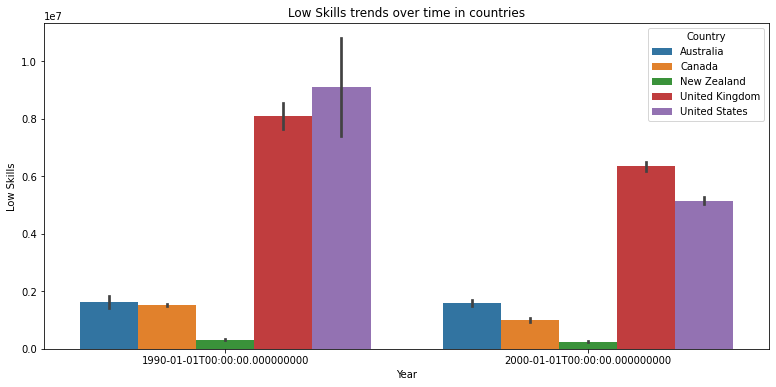

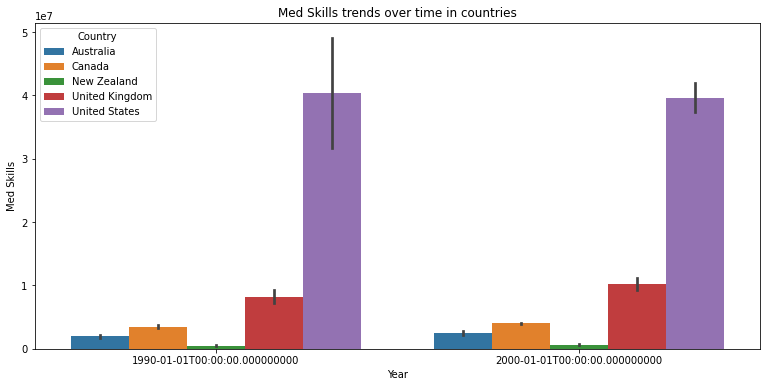

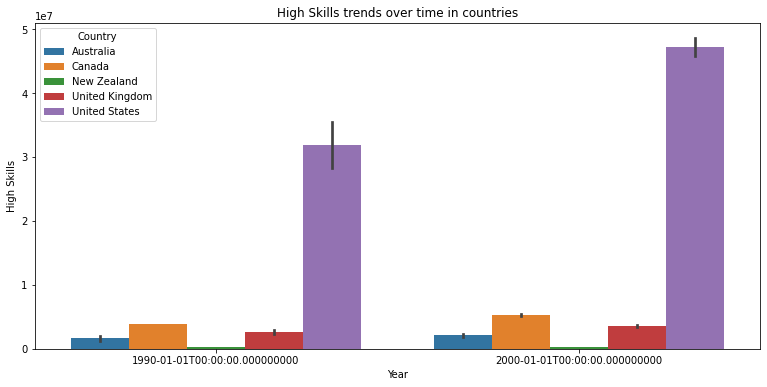

In [5]:
# 2. Distribution of Low,  High Categories
categories = ['Low Skills', 'Med Skills', 'High Skills', 'Total']
for category in categories:
    plt.figure(figsize=(13, 6))
    sns.barplot(data=dd, x='Year', y=category, hue='Country')
    plt.title(f"{category} trends over time in countries")

plt.show()

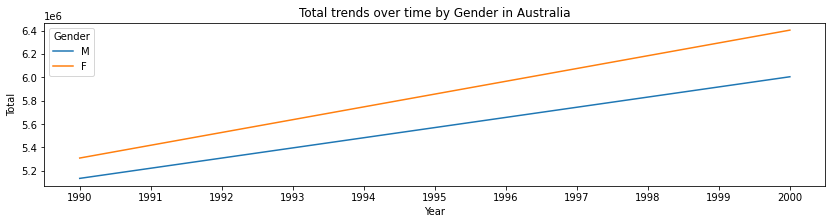

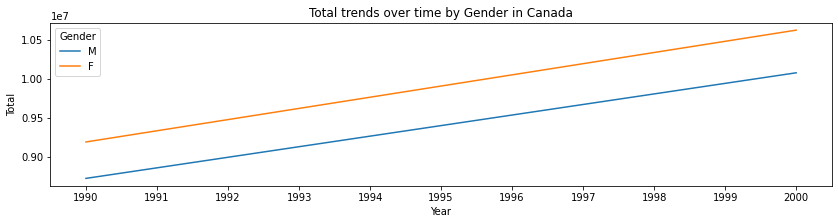

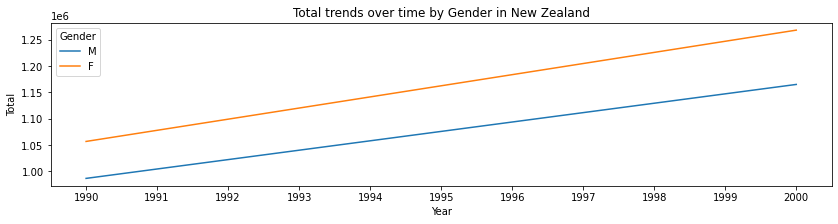

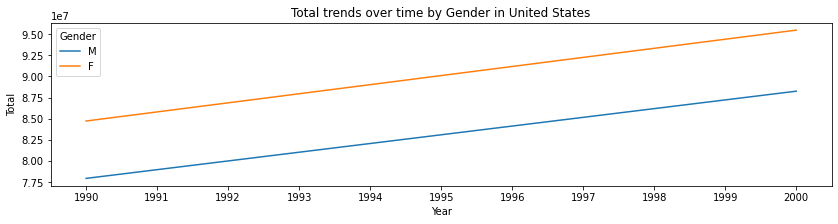

In [6]:
# 3. Gender Analysis, Country-wise trends over time
for country in dd['Country'].unique():
    country_data = dd[dd['Country'] == country]
    plt.figure(figsize=(14, 3))
    sns.lineplot(data=country_data, x='Year', y='Total', hue='Gender')
    plt.title(f'Total trends over time by Gender in {country}')
    plt.show()

# Resoruces
- [Measuring Brain Drain](https://datacatalog.worldbank.org/search/dataset/0043585/Measuring-Brain-Drain-by-Gender-1990-2000)
- [Documentation-PDF](https://microdata.worldbank.org/index.php/catalog/391/pdf-documentation)